# How to Load Natural Stimulus Data

In [141]:
import numpy as np
import os
import h5py
import pyret
import binary     # in igor >> recording
from load_natural_stimulus import *

# This is a bit of magic to make matplotlib figures appear inline in the
# notebook rather than in a new window.
%matplotlib inline
import matplotlib.pyplot as plt

from pylab import rcParams
rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
rcParams['image.interpolation'] = 'nearest'
rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load data

In [142]:
data_dir = os.path.expanduser('~/Documents/Stanford/00 Baccus Lab/Data 2015_07_02/')
stim_file = data_dir + 'natural_scenes_stimulus_compressed.h5'
f = h5py.File(stim_file)

In [143]:
f.keys()

[u'images', u'spikes', u'stimulus']

In [144]:
natural_stimuli = NaturalScenesStimulus(f['images'], f['stimulus'])

In [145]:
natural_stimuli[:5].shape

> /Users/lmcintosh/Git/natural-scenes/load_natural_stimulus.py(83)__getitem__()
-> img_index = self.stimulus[index, 0]
(Pdb) type(self.images)
<class 'h5py._hl.dataset.Dataset'>
(Pdb) type(self.images[0])
<type 'numpy.ndarray'>
(Pdb) self.images.dtype()
*** TypeError: 'numpy.dtype' object is not callable
(Pdb) self.images.dtype
dtype('float64')
(Pdb) self.images
<HDF5 dataset "images": shape (25, 1519, 1007), type "<f8">
(Pdb) self.images[0][0][0]
210.38027059620478
(Pdb) np.max(self.images)
19000.929885766909
(Pdb) np.min(self.images)
-20.234515426134632
(Pdb) hist(self.images[0])
*** NameError: name 'hist' is not defined
(Pdb) np.histogram(self.images[0])
(array([1236330,   59139,   24292,   16550,   13925,   12281,   11867,
         12249,   14107,  128893]), array([  6.57629089e+00,   1.08220993e+03,   2.15784357e+03,
         3.23347721e+03,   4.30911085e+03,   5.38474449e+03,
         6.46037813e+03,   7.53601177e+03,   8.61164541e+03,
         9.68727905e+03,   1.07629127e+04]))

BdbQuit: 

In [117]:
f['stimulus'][6]

array([ 14, 507, 961], dtype=int32)

In [96]:
natural_stimuli[0]

array([[ 0.0480735 ,  0.04449928,  0.03280316, ...,  0.06665135,
         0.02269374,  0.00889921],
       [ 0.06773371,  0.06445769,  0.06175318, ...,  0.05189   ,
         0.01927165,  0.00939146],
       [ 0.05868719,  0.06338156,  0.05555303, ...,  0.03666947,
         0.01870454,  0.01009866],
       ..., 
       [ 0.0074524 ,  0.00703496,  0.00940842, ...,  0.25451327,
         0.43897636,  0.54131056],
       [ 0.00723091,  0.00747125,  0.00946597, ...,  0.19376156,
         0.33556861,  0.45861923],
       [ 0.0097389 ,  0.00984829,  0.010297  , ...,  0.21439079,
         0.22680118,  0.30409751]])

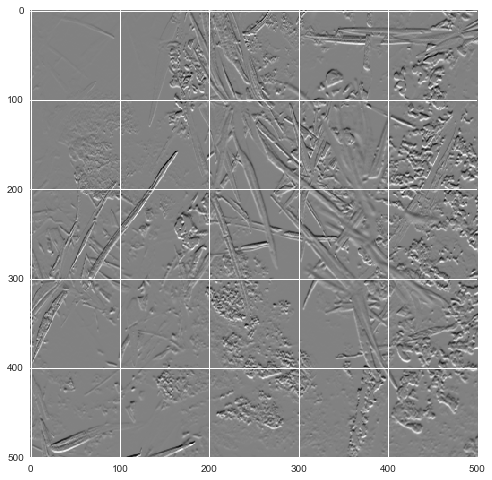

In [107]:
plt.imshow(natural_stimuli[2] - natural_stimuli[0])

In [98]:
natural_stimuli.shape

(541200, 500, 500)

In [11]:
f.close()

In [118]:
tmp = natural_stimuli[:100]

# This still takes too much memory. What can we do?

In [121]:
from sys import getsizeof

In [124]:
x = natural_stimuli[0]

In [125]:
x.shape

(500, 500)

In [126]:
type(x)

numpy.ndarray

In [127]:
x.dtype

dtype('float64')

In [130]:
natural_stimuli.shape

(541200, 500, 500)

## Currently the stimulus expanded would take 1.08 petabytes in memory

In [135]:
x.nbytes * natural_stimuli.shape[0] / 1e9

1082.4

## But the stimulus is in float64. If downsampled to uint8 (the monitor's resolution), we'd only have 135.3 GB

In [140]:
500 * 500 * natural_stimuli.shape[0] / 1e9

135.3

## And downsampling the time and cutting out the center 250x250 pixels would leave us with around 16 GB

In [139]:
250*250 * natural_stimuli.shape[0] / 2e9

16.9125

In [128]:
getsizeof(x)

80

In [123]:
getsizeof(natural_stimuli[:100])

80

# Load Training Examples

In [15]:
data_dir = os.path.expanduser('~/Documents/Stanford/00 Baccus Lab/Data 2015_07_02/')
stim_file = data_dir + 'natural_scenes_stimulus_compressed.h5'
f = h5py.File(stim_file)

In [16]:
natural_dataset = NaturalDataset(f['images'], f['stimulus'], 40)

In [19]:
natural_dataset[0:2]

> /Users/lmcintosh/Git/natural-scenes/load_natural_stimulus.py(130)__getitem__()
-> index = np.append(index, np.ones((self.duration-1,)))
(Pdb) index
slice(0, 2, None)
(Pdb) blah = np.append(index, np.ones((39,)))
(Pdb) blah
array([slice(0, 2, None), 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,
       1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,
       1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,
       1.0, 1.0, 1.0], dtype=object)
(Pdb) ? slice
*** No help on slice
(Pdb) q


BdbQuit: 

In [46]:
indices = np.arange(5)

[autoreload of load_natural_stimulus failed: Traceback (most recent call last):
  File "/Users/lmcintosh/Git/ipython/IPython/extensions/autoreload.py", line 247, in check
    superreload(m, reload, self.old_objects)
  File "load_natural_stimulus.py", line 138
    imgs =
          ^
SyntaxError: invalid syntax
]


In [51]:
isinstance(indices, np.ndarray)

True

In [53]:
np.array(1).shape

()